# Estudi KMeans

## Lectura fitxer students

In [130]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)

In [131]:
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)

In [132]:
X = df.drop('target', axis=1)
y = df['target']

## Aplicació model

### Utilització de totes les característiques
Fent 2 agrupacions per determinar si necessiten o no assitència mèdica. 

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [134]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [135]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X_scaled)


c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [148]:
df_clustered = X.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,1
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,1
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,1
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,1


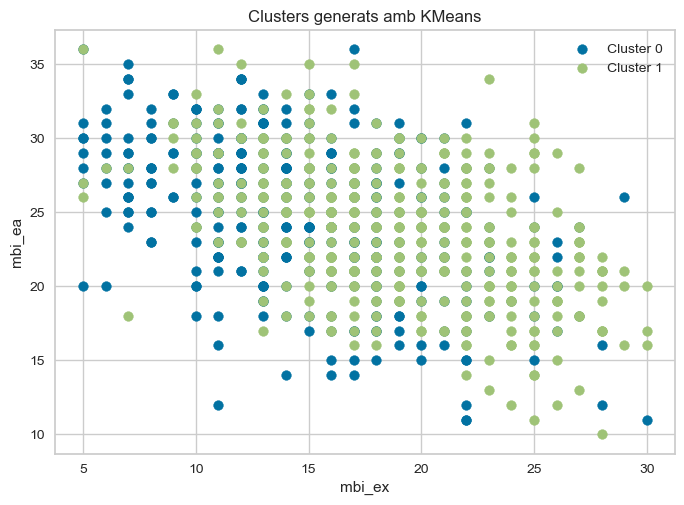

In [137]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [138]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age      year       sex      glang      part       job  \
cluster                                                                 
0        24.297674  4.467442  1.667442   9.409302  0.679070  0.534884   
1        20.578947  1.815789  1.721491  18.964912  0.453947  0.173246   

            stud_h    health      psyt        jspe   qcae_cog   qcae_aff  \
cluster                                                                    
0        16.553488  3.953488  0.223256  109.665116  59.681395  35.211628   
1        33.526316  3.611842  0.225877  103.271930  57.436404  34.381579   

              amsp  erec_mean     mbi_ex     mbi_cy     mbi_ea  
cluster                                                         
0        23.586047   0.732171  14.934884   9.730233  24.860465  
1        22.739035   0.708803  18.710526  10.407895  23.592105  


In [139]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    430
1    456
dtype: int64

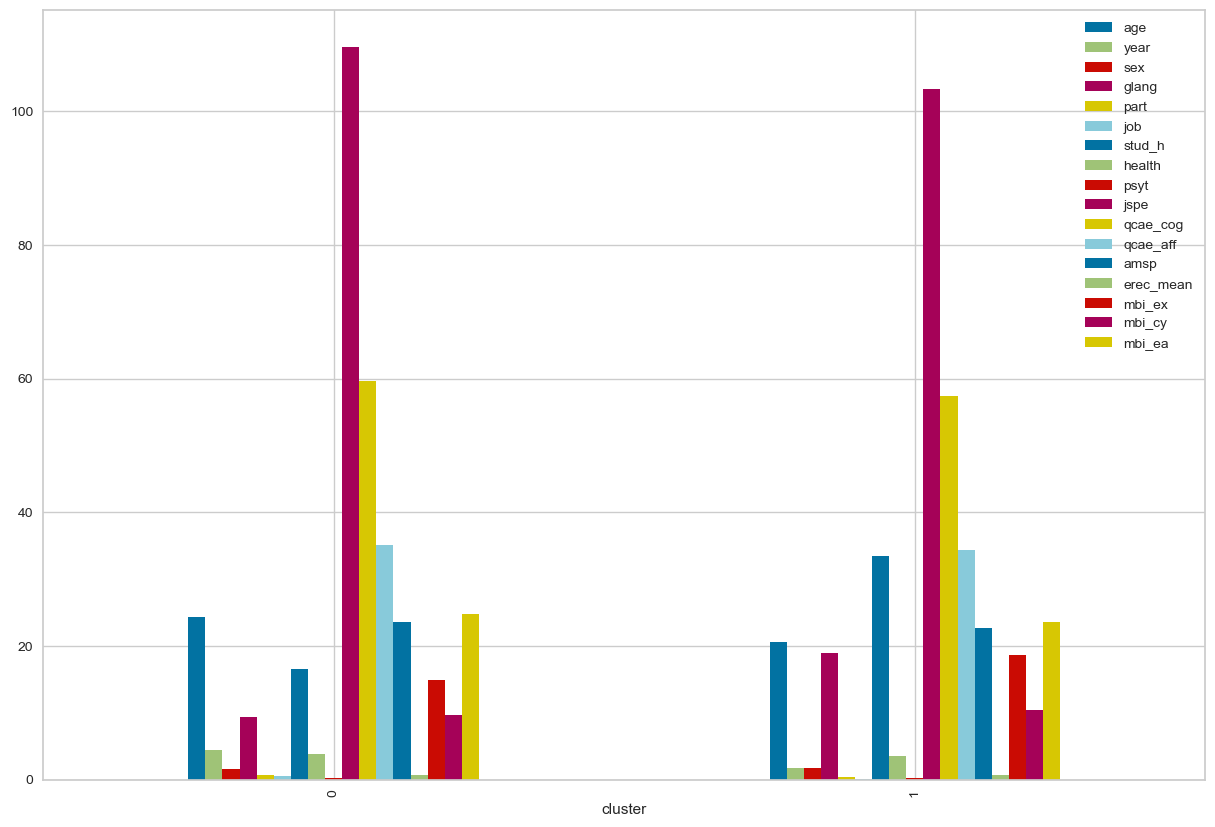

In [140]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

**Comentari**

El Cluster 0 té una població lleugerament més gran, amb menys hores invertides d'estudi, i una participació i presència laboral més altes.  D'altra banda, el Cluster 1 és més jove, amb menys anys d'estudi, amb una major dedicació a l'estudi a casa i amb una major proporció de dones. La seva participació i presència laboral són més baixes en comparació amb el Cluster 0. Els dos clusters mostren baixos nivells d'estrès percebut i mitjanes en els valors cognitius i afectius. 

#### Avaluació model

Definim un _threshold_ per determinar a quin punt considerem que la persona en qüestió pateix ansietat o depressió, tenint en compte que la nostra _y_ és la suma de *escala de depressió* i *escala d'ansiestat*. Aquestes dues es mouen en l'interval:
* cesd: 0 a 56 
* stai_t: 20 a 77


In [154]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [142]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster,target
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,1,95
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0,40
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,1,98
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,1,65
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,23,4,34,1,80
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,17,5,24,1,67
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,15,8,31,1,59
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,22,15,19,0,91


In [143]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0     53
1    126
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    430
1    456
dtype: int64


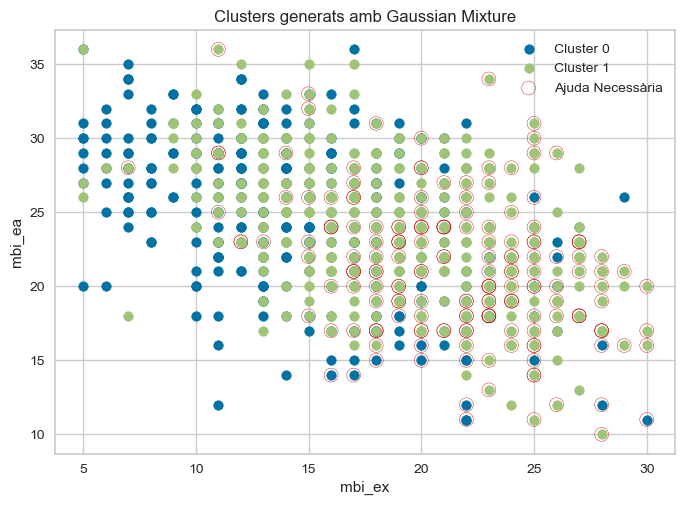

In [144]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

### Provem amb diferents tresholds


Recompte estudiants que necessiten ajuda (Threshold = 93.1):
 cluster
0    13
1    57
dtype: int64


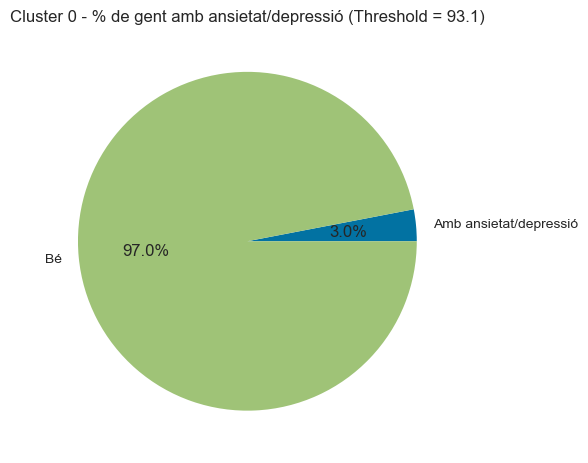

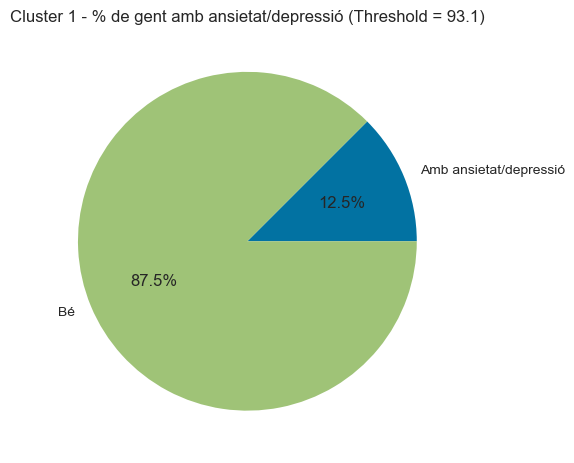


Recompte estudiants que necessiten ajuda (Threshold = 79.8):
 cluster
0     53
1    126
dtype: int64


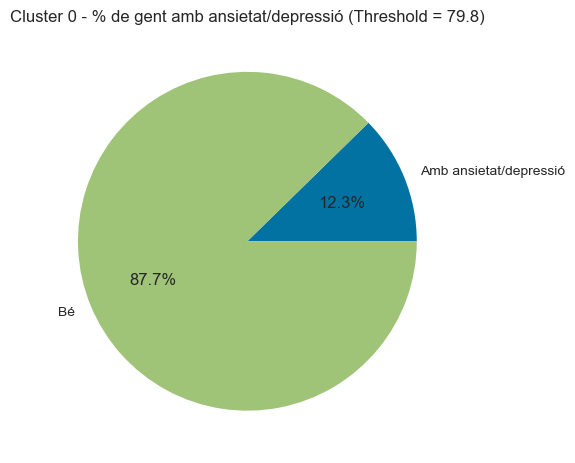

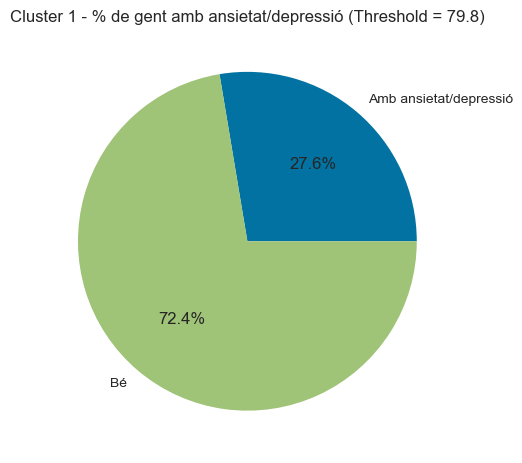


Recompte estudiants que necessiten ajuda (Threshold = 66.5):
 cluster
0    112
1    225
dtype: int64


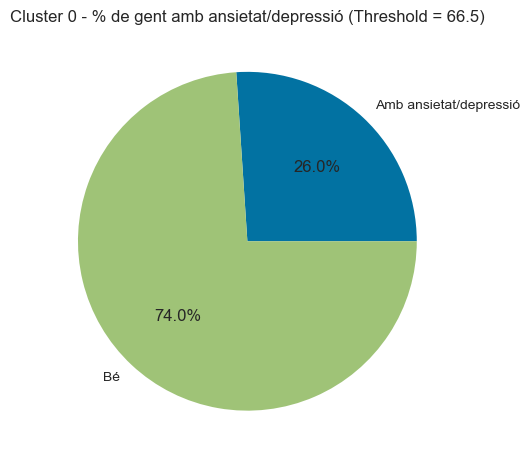

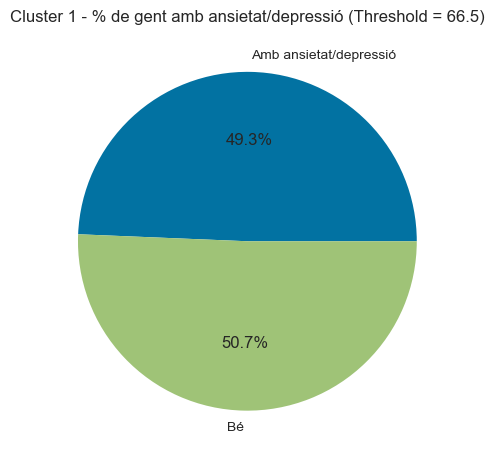

In [159]:
import matplotlib.pyplot as plt

# Definir una lista de umbrales
thresholds = [(cesd_max+stai_t_max)*0.7, (cesd_max+stai_t_max)*0.6, (cesd_max+stai_t_max)*0.5]

for threshold in thresholds:
    # Filtrem les files amb 'target' superior al llindar
    df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

    # Fem el recompte agrupant per 'cluster'
    count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

    # Mostrem el resultat
    print(f"\nRecompte estudiants que necessiten ajuda (Threshold = {threshold}):\n", count_by_cluster)

    # Gràfic de pastís amb el percentatge de gent amb ansietat/depressió per a cada cluster
    labels = 'Amb ansietat/depressió', 'Bé'
    dades = []
    for c in range(n_grups):
        resta = total_cluster[c] - count_by_cluster[c]
        dades.append([count_by_cluster[c], resta])

    for i, d in enumerate(dades):
        fig, ax = plt.subplots()
        ax.pie(d, labels=labels, autopct='%1.1f%%')
        ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió (Threshold = {threshold})')
        plt.show()


**Conclusions**

Veiem que el cluster 1 és el hauria de tenir la majoria d'estudiants amb ansietat/depressió. Si visulitzem els diagrames veient que utilitzant un treshold de 79.8 no obtenim gaire bons resultats ja que al cluster 1 27.6% amb problemes de salut mental i al cluster 0 un 12.3%, és a dir una diferència del 15.3%. Aquesta diferència no es prou significativa per poder separar els estudiants en dos grups segons el grau de depressió. Si fem el treshols més petit veiem que la agrupació empitjora però. si l'augmentem aquesta millora i veiem que s'arriba a obtenir una diferència del 23.6% entre els estudiants que necessiten ajuda al cluster 1 repecte el cluste 0.


### Utilització de les característiques més rellevants
Fent 2 agrupacions per determinar si necessiten o no assitència mèdica. 

#### Random forest

Recordem que els coeficients amb Random Forest dels diferents atributs eren:

|    | atribut   | importancia |
|----|-----------|-------------|
| 9  | jspe      | 0.086444    |
| 10 | qcae_cog  | 0.084919    |
| 6  | stud_h    | 0.084754    |
| 11 | qcae_aff  | 0.082221    |
| 14 | mbi_ex    | 0.079569    |
| 12 | amsp      | 0.079371    |
| 13 | erec_mean | 0.078246    |
| 16 | mbi_ea    | 0.078138    |
| 15 | mbi_cy    | 0.073213    |
| 0  | age       | 0.067432    |
| 1  | year      | 0.048998    |
| 7  | health    | 0.041126    |
| 3  | glang     | 0.027404    |
| 4  | part      | 0.026077    |
| 5  | job       | 0.022708    |
| 2  | sex       | 0.021316    |
| 8  | psyt      | 0.018066    |

Per fer aquesta part ens quedarem els atributs que tenen l'importància major a **0.060000**

In [164]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [165]:
# X Random Forest
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff', 'mbi_ex', 'amsp', 'erec_mean', 'mbi_ea', 'mbi_cy', 'age']]

In [166]:
from  sklearn.preprocessing  import StandardScaler 
# Estandarizar las características 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_rf)

In [169]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X_scaled)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [170]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster
0,88,62,56,27,17,17,0.738095,20,13,18,0
1,109,55,20,37,14,22,0.690476,26,11,26,1
2,106,64,36,39,24,17,0.690476,23,7,21,0
3,101,52,51,33,16,18,0.833333,21,10,21,0
4,102,58,22,28,22,21,0.690476,23,14,21,0


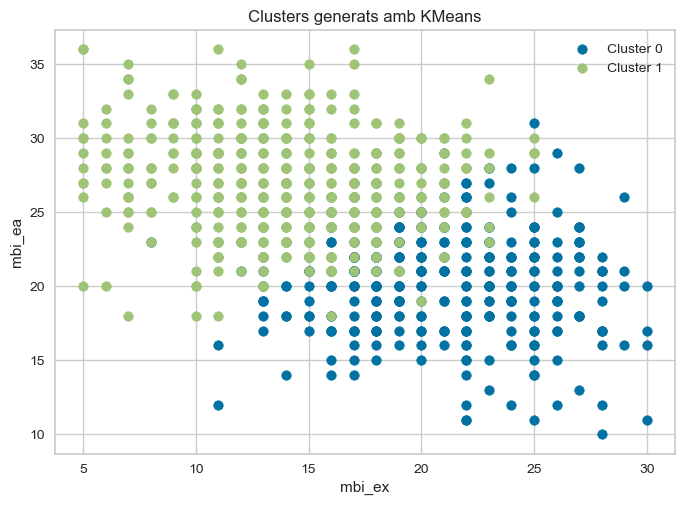

In [171]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [172]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h   qcae_aff     mbi_ex       amsp  \
cluster                                                                      
0        104.736292  57.091384  26.793734  35.887728  20.548303  22.028721   
1        107.622266  59.618290  24.143141  33.944334  14.083499  24.003976   

         erec_mean     mbi_ea     mbi_cy        age  
cluster                                              
0         0.722554  20.644909  13.545692  21.751958  
1         0.718309  26.920477   7.439364  22.864811  


In [173]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    383
1    503
dtype: int64

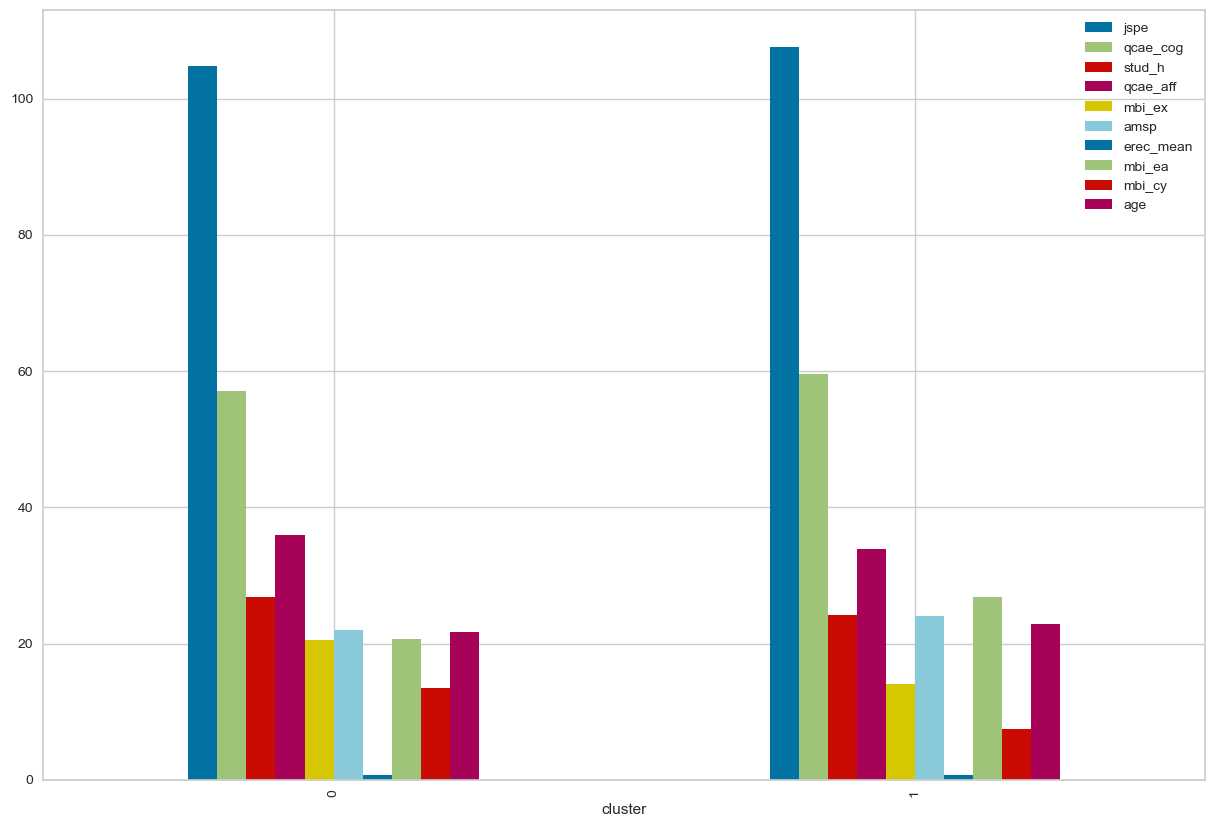

In [174]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [175]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [176]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster,target
0,88,62,56,27,17,17,0.738095,20,13,18,0,95
1,109,55,20,37,14,22,0.690476,26,11,26,1,40
2,106,64,36,39,24,17,0.690476,23,7,21,0,98
3,101,52,51,33,16,18,0.833333,21,10,21,0,65
4,102,58,22,28,22,21,0.690476,23,14,21,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...
881,106,63,45,39,23,28,0.619048,34,4,21,1,80
882,113,67,13,40,17,21,0.809524,24,5,20,1,67
883,100,50,50,31,15,24,0.547619,31,8,19,1,59
884,120,64,20,39,22,21,0.785714,19,15,24,0,91


In [177]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    142
1     37
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    383
1    503
dtype: int64


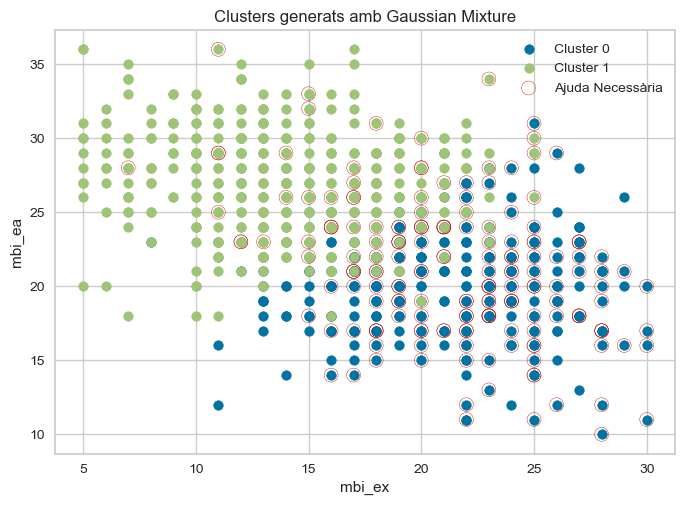

In [178]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()


Recompte estudiants que necessiten ajuda (Threshold = 93.1):
 cluster
0    61
1     9
dtype: int64


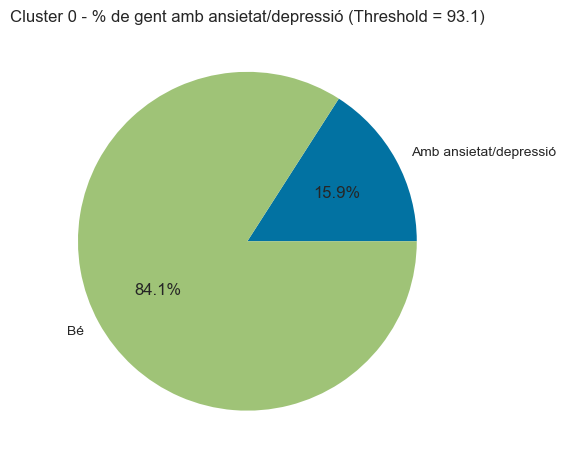

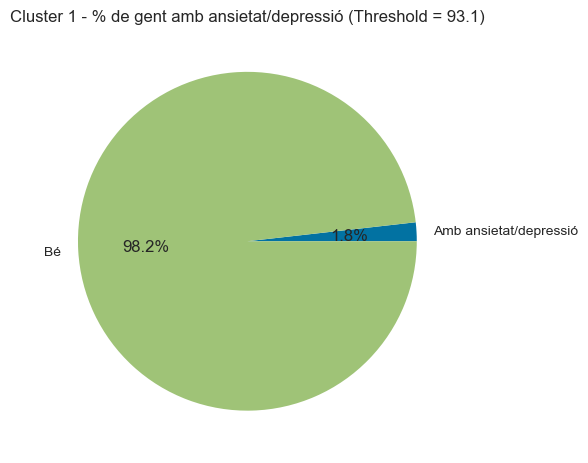


Recompte estudiants que necessiten ajuda (Threshold = 79.8):
 cluster
0    142
1     37
dtype: int64


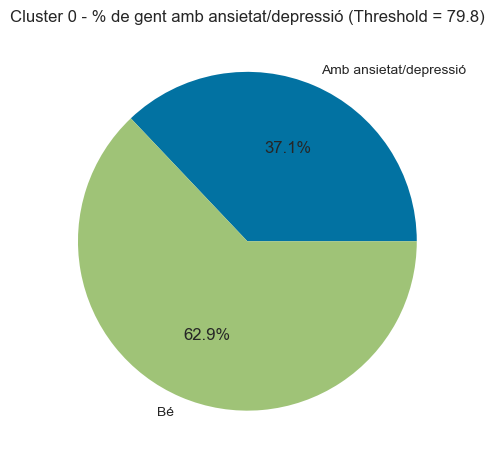

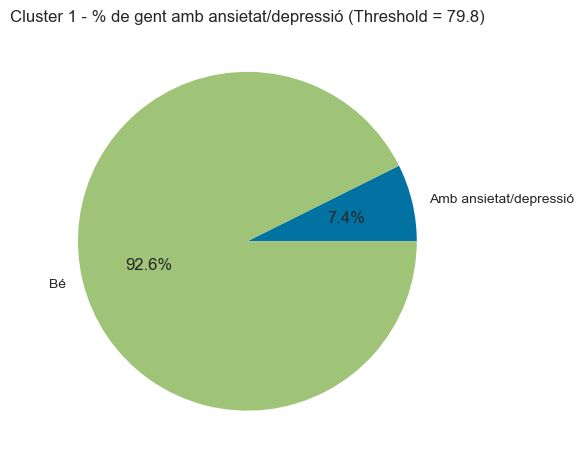


Recompte estudiants que necessiten ajuda (Threshold = 66.5):
 cluster
0    247
1     90
dtype: int64


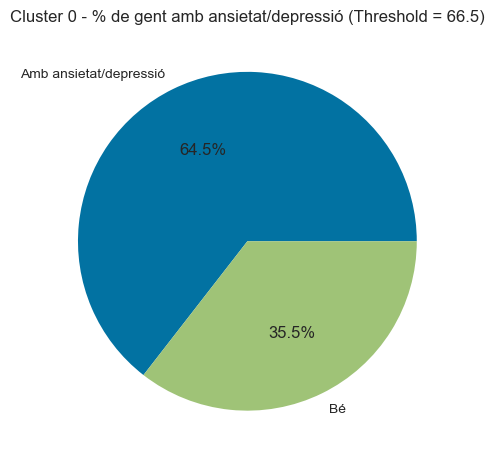

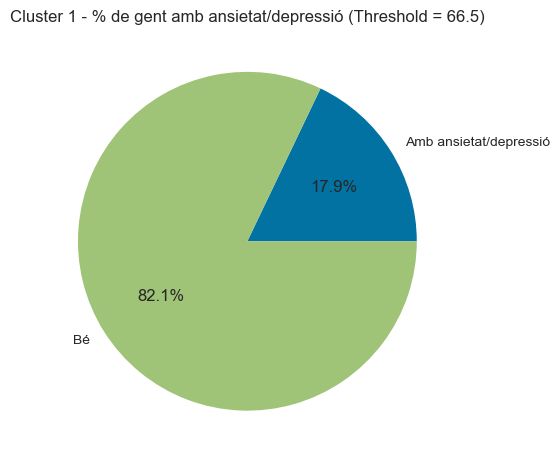

In [182]:
import matplotlib.pyplot as plt

# Definir una lista de umbrales
thresholds = [(cesd_max+stai_t_max)*0.7,(cesd_max+stai_t_max)*0.6, (cesd_max+stai_t_max)*0.5]

for threshold in thresholds:
    # Filtrem les files amb 'target' superior al llindar
    df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

    # Fem el recompte agrupant per 'cluster'
    count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

    # Mostrem el resultat
    print(f"\nRecompte estudiants que necessiten ajuda (Threshold = {threshold}):\n", count_by_cluster)

    # Gràfic de pastís amb el percentatge de gent amb ansietat/depressió per a cada cluster
    labels = 'Amb ansietat/depressió', 'Bé'
    dades = []
    for c in range(n_grups):
        resta = total_cluster[c] - count_by_cluster[c]
        dades.append([count_by_cluster[c], resta])

    for i, d in enumerate(dades):
        fig, ax = plt.subplots()
        ax.pie(d, labels=labels, autopct='%1.1f%%')
        ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió (Threshold = {threshold})')
        plt.show()


**Conclusions**

Anteriorment, quan hem utilitzat totes les característiques, hem vist segons els percentatges que ens donava, que el cluster 1 era el que havia de tenir més estudiants amb despressió/ansietat i hem obtingut com a màxima diferència entre els dos clusters un 23.6% utilitzant un treshold de 66.5. 

Ara bé, utilitzant les variables més rellevants segons Random Forest, hem obtingut els següents resultats:

TRESHOLD 93.1:
* Cluster 0: 15.9%
* Cluster 1: 1.8%

TRESHOLD 79.8:
* Cluster 0: 37.1%
* Cluster 1: 7.4%

TRESHOLD 66.5:
* Cluster 0: 64.5%
* Cluster 1: 17.9%

Percebem que reduint les característiques hem obtingut una millora pel que fa l'agrupació. Hem obtingut una diferència màxima del 46.6% entre els dos clusters segons les persones que necessiten ajuda psicològica.

Així, tornem a reduir el nombre de caracterísitques.


#### Random forest II

Recordem que els coeficients amb Random Forest dels atributs que hem tingut en compte abans:

|    | atribut   | importancia |
|----|-----------|-------------|
| 9  | jspe      | 0.086444    |
| 10 | qcae_cog  | 0.084919    |
| 6  | stud_h    | 0.084754    |
| 11 | qcae_aff  | 0.082221    |
| 14 | mbi_ex    | 0.079569    |
| 12 | amsp      | 0.079371    |
| 13 | erec_mean | 0.078246    |
| 16 | mbi_ea    | 0.078138    |
| 15 | mbi_cy    | 0.073213    |
| 0  | age       | 0.067432    |

Ara agafarem els atributs amb importància major a **0.080000**

In [209]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [210]:
# X Random Forest
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff']]

In [211]:
from  sklearn.preprocessing  import StandardScaler 
# Estandarizar las características 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_rf)

In [212]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X_scaled)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [213]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,cluster
0,88,62,56,27,1
1,109,55,20,37,0
2,106,64,36,39,0
3,101,52,51,33,1
4,102,58,22,28,1


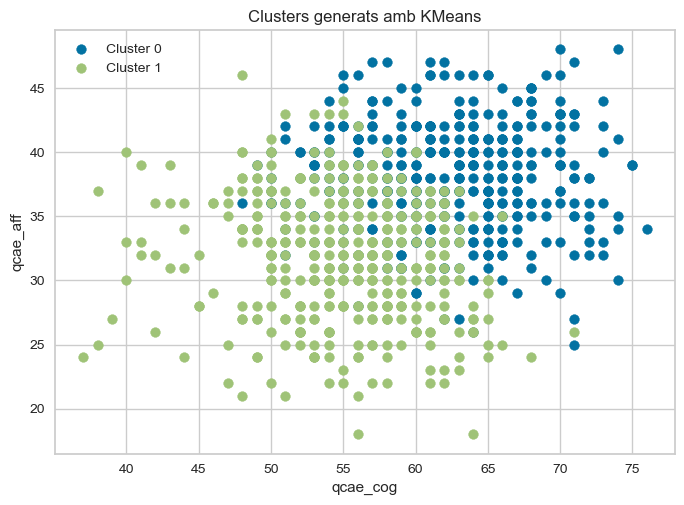

In [214]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['qcae_cog'], cluster_points['qcae_aff'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('qcae_cog')
plt.ylabel('qcae_aff')
plt.legend()
plt.show()

In [215]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h   qcae_aff
cluster                                             
0        111.805936  62.223744  21.630137  37.808219
1        101.064732  54.910714  28.866071  31.828125


In [216]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    438
1    448
dtype: int64

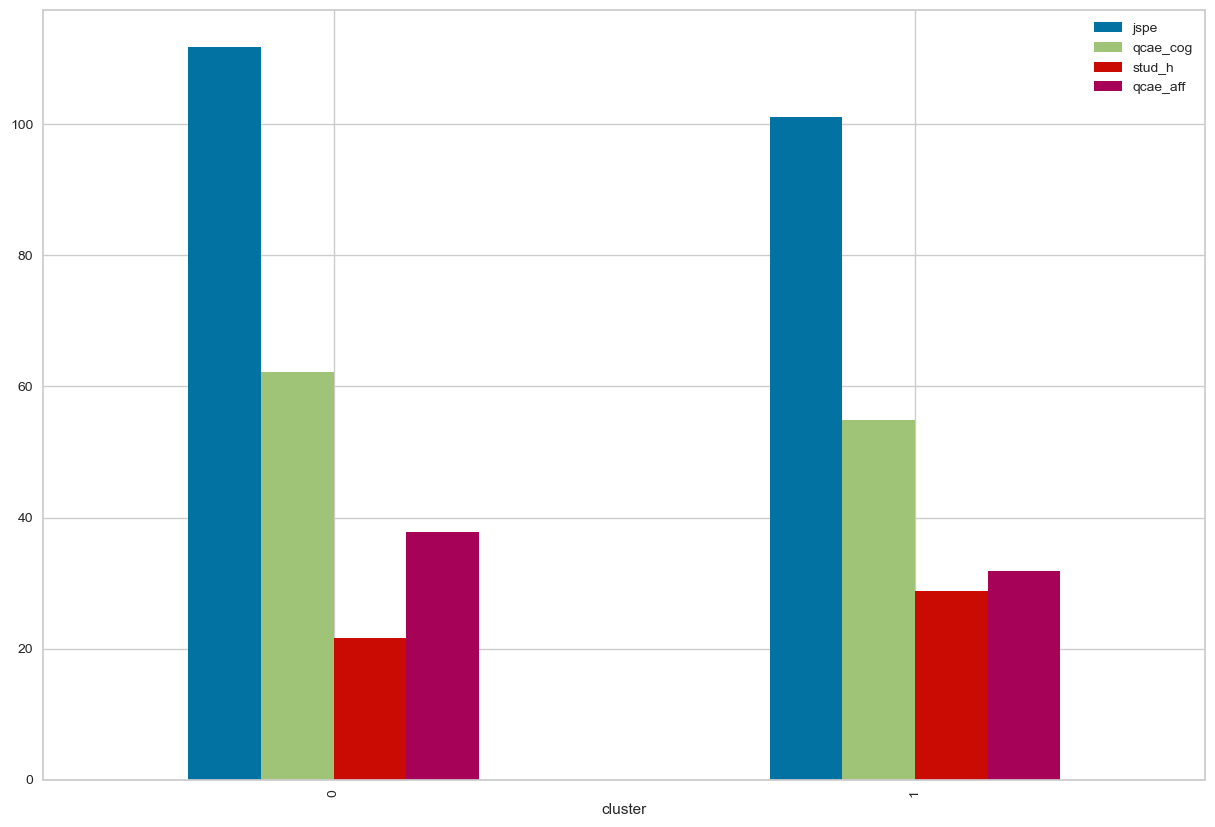

In [217]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [218]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [219]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,cluster,target
0,88,62,56,27,1,95
1,109,55,20,37,0,40
2,106,64,36,39,0,98
3,101,52,51,33,1,65
4,102,58,22,28,1,60
...,...,...,...,...,...,...
881,106,63,45,39,0,80
882,113,67,13,40,0,67
883,100,50,50,31,1,59
884,120,64,20,39,0,91


In [220]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    99
1    80
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    438
1    448
dtype: int64


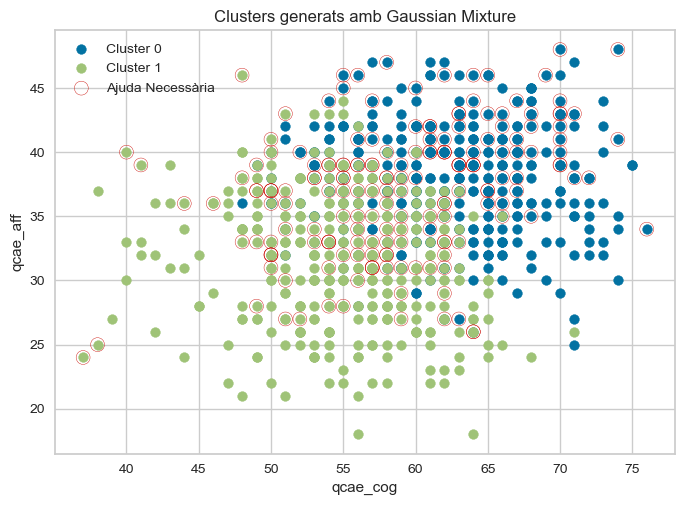

In [221]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['qcae_cog'], cluster_points['qcae_aff'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['qcae_cog'], df_target_gt_threshold['qcae_aff'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('qcae_cog')
plt.ylabel('qcae_aff')
plt.legend()
plt.show()


Recompte estudiants que necessiten ajuda (Threshold = 93.1):
 cluster
0    41
1    29
dtype: int64


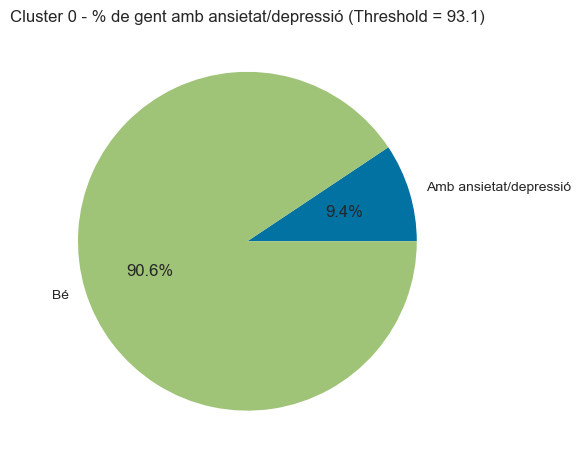

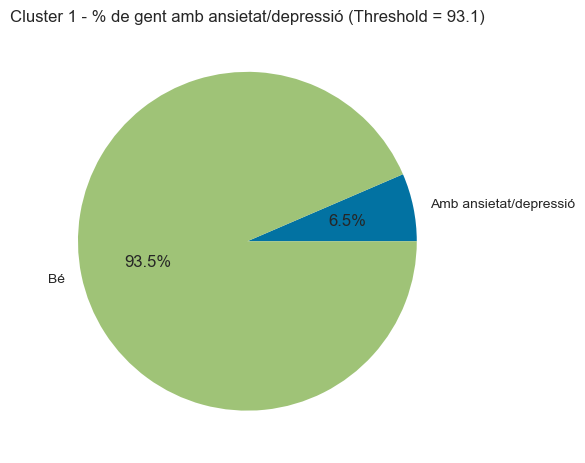


Recompte estudiants que necessiten ajuda (Threshold = 79.8):
 cluster
0    99
1    80
dtype: int64


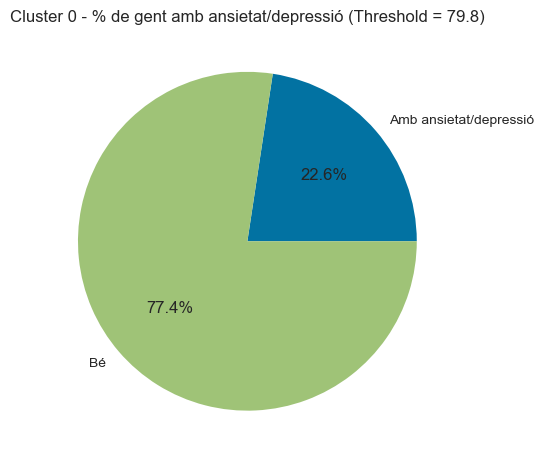

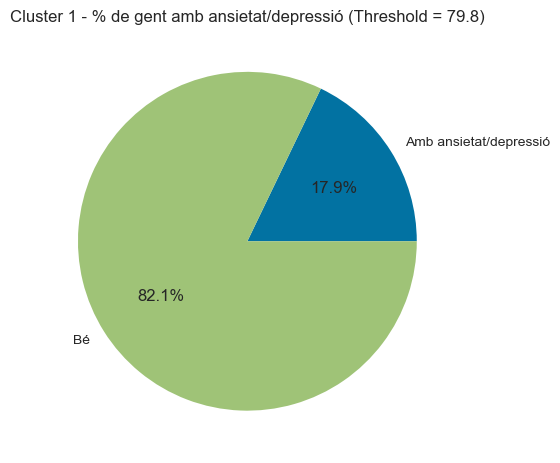


Recompte estudiants que necessiten ajuda (Threshold = 66.5):
 cluster
0    187
1    150
dtype: int64


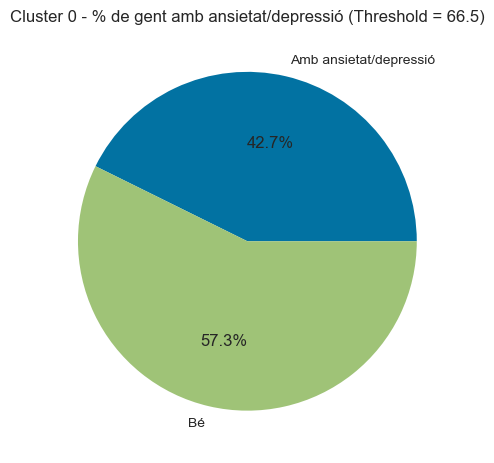

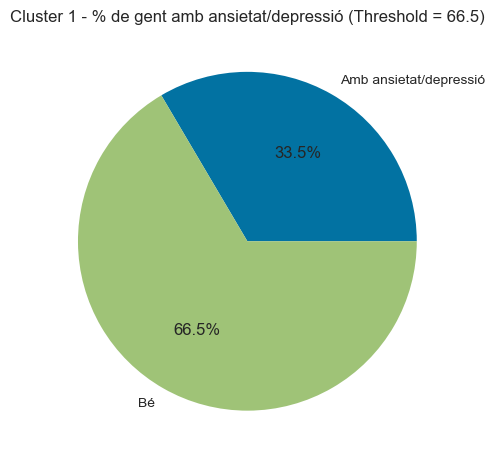

In [222]:
import matplotlib.pyplot as plt

# Definir una lista de umbrales
thresholds = [(cesd_max+stai_t_max)*0.7,(cesd_max+stai_t_max)*0.6, (cesd_max+stai_t_max)*0.5]

for threshold in thresholds:
    # Filtrem les files amb 'target' superior al llindar
    df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

    # Fem el recompte agrupant per 'cluster'
    count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

    # Mostrem el resultat
    print(f"\nRecompte estudiants que necessiten ajuda (Threshold = {threshold}):\n", count_by_cluster)

    # Gràfic de pastís amb el percentatge de gent amb ansietat/depressió per a cada cluster
    labels = 'Amb ansietat/depressió', 'Bé'
    dades = []
    for c in range(n_grups):
        resta = total_cluster[c] - count_by_cluster[c]
        dades.append([count_by_cluster[c], resta])

    for i, d in enumerate(dades):
        fig, ax = plt.subplots()
        ax.pie(d, labels=labels, autopct='%1.1f%%')
        ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió (Threshold = {threshold})')
        plt.show()


Si analitzem els resultat que ens han sortit al reduïr més les característiques obtingudes del Random Forest veiem que són pitjors que els que hem obtingut anteriorment. Per tant, de moment, ens quedem amb els resultats anteriors i continuem buscant un mètode per triar les característiques que fem servir per fer el clustering i poder obtenir uns resultats prometedors.

#### Linear Regression

Ara en comptes de fer la redddució de característiques amb Random Forest, utilitzem els coeficients obtinguts després d'haver aplicat Linear Regression. 

Recordem que els coeficients amb Linear Regression dels diferents atributs eren:
|    | Feature   | Coefficient |
|----|-----------|-------------|
| 8  | psyt      | 7.979258    |
| 2  | sex       | 4.281193    |
| 13 | erec_mean | 2.110597    |
| 14 | mbi_ex    | 1.319494    |
| 11 | qcae_aff  | 0.742631    |
| 0  | age       | 0.380706    |
| 15 | mbi_cy    | 0.224846    |
| 6  | stud_h    | 0.124795    |
| 3  | glang     | 0.052498    |
| 10 | qcae_cog  | -0.039671   |
| 9  | jspe      | -0.168637   |
| 12 | amsp      | -0.382934   |
| 16 | mbi_ea    | -1.007413   |
| 1  | year      | -1.074211   |
| 5  | job       | -1.184904   |
| 4  | part      | -1.968074   |
| 7  | health    | -3.010553   |

Per fer aquesta part ens quedarem els atributs que tenen l'importància major a **0.100000**

In [223]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [224]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex', 'qcae_aff', 'age', 'mbi_cy', 'stud_h']]

In [225]:
from  sklearn.preprocessing  import StandardScaler 
# Estandarizar las características 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_lr)

In [226]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X_scaled)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [227]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster
0,0,1,0.738095,17,27,18,13,56,0
1,0,1,0.690476,14,37,26,11,20,0
2,0,2,0.690476,24,39,21,7,36,1
3,0,2,0.833333,16,33,21,10,51,1
4,0,1,0.690476,22,28,21,14,22,0


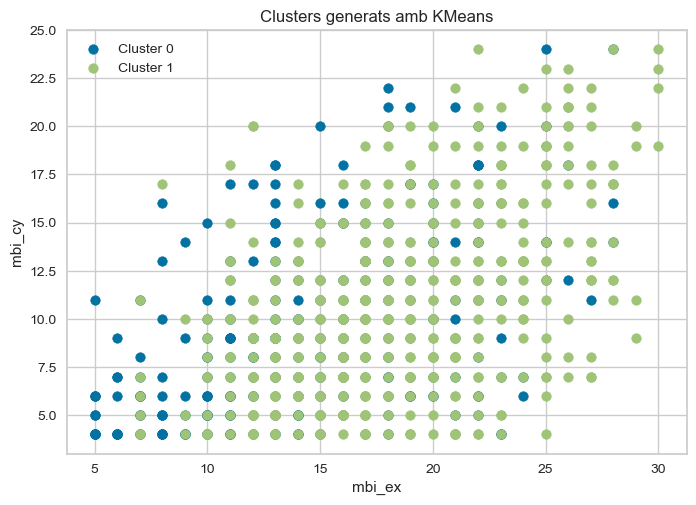

In [228]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

In [229]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

             psyt       sex  erec_mean     mbi_ex   qcae_aff        age  \
cluster                                                                   
0        0.100000  1.193939   0.688745  14.560606  31.263636  23.290909   
1        0.298561  1.992806   0.738780  18.253597  36.874101  21.845324   

            mbi_cy     stud_h  
cluster                        
0         9.224242  24.281818  
1        10.586331  25.886691  


In [230]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    330
1    556
dtype: int64

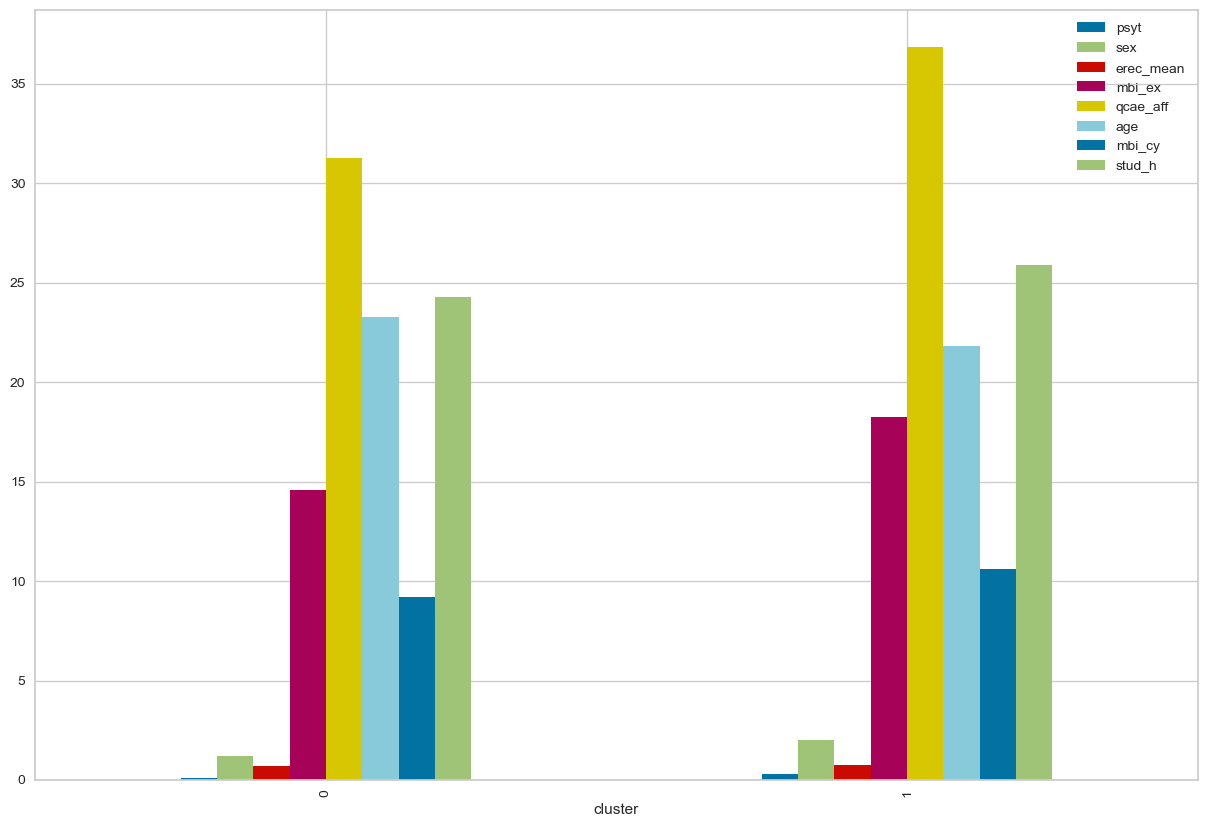

In [231]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [232]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [233]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster,target
0,0,1,0.738095,17,27,18,13,56,0,95
1,0,1,0.690476,14,37,26,11,20,0,40
2,0,2,0.690476,24,39,21,7,36,1,98
3,0,2,0.833333,16,33,21,10,51,1,65
4,0,1,0.690476,22,28,21,14,22,0,60
...,...,...,...,...,...,...,...,...,...,...
881,0,1,0.619048,23,39,21,4,45,0,80
882,0,2,0.809524,17,40,20,5,13,1,67
883,0,1,0.547619,15,31,19,8,50,0,59
884,1,2,0.785714,22,39,24,15,20,1,91


In [234]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0     28
1    151
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    330
1    556
dtype: int64


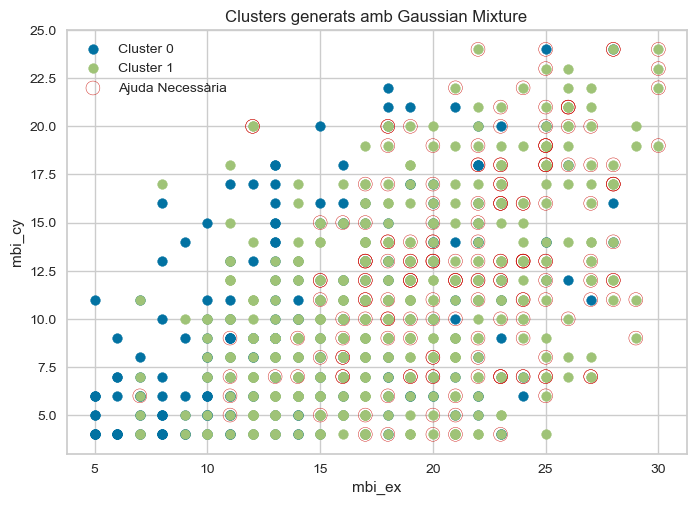

In [235]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_cy'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()


Recompte estudiants que necessiten ajuda (Threshold = 93.1):
 cluster
0     6
1    64
dtype: int64


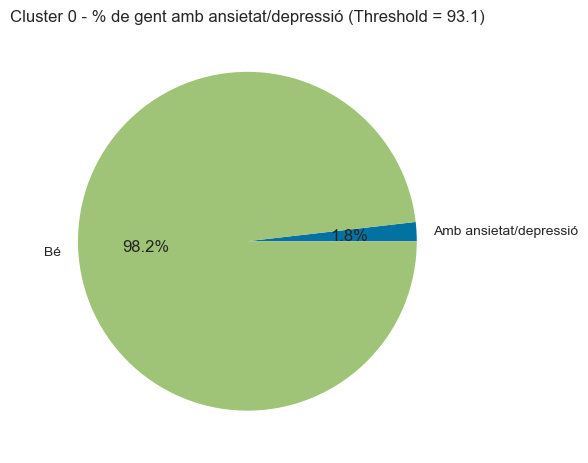

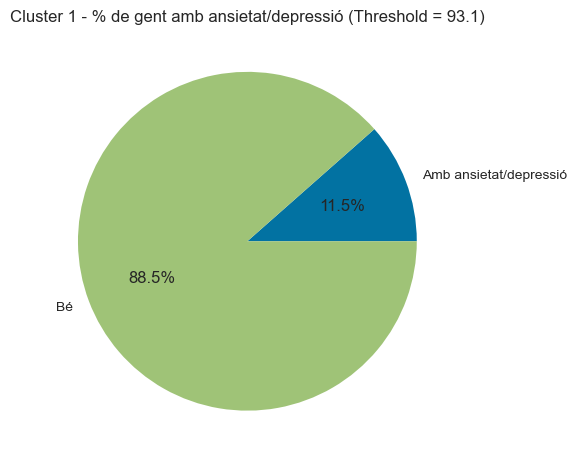


Recompte estudiants que necessiten ajuda (Threshold = 79.8):
 cluster
0     28
1    151
dtype: int64


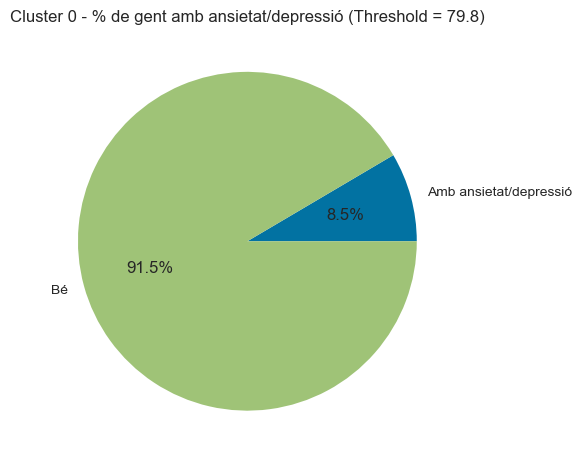

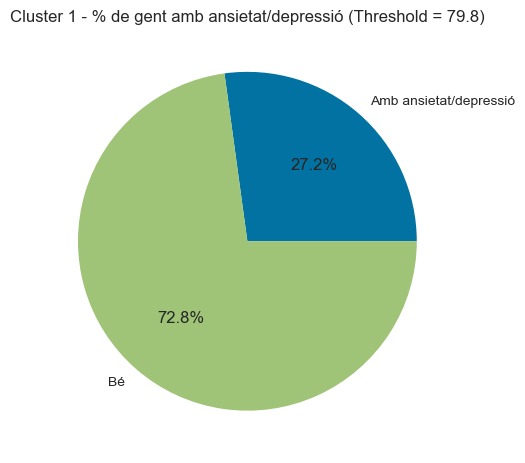


Recompte estudiants que necessiten ajuda (Threshold = 66.5):
 cluster
0     58
1    279
dtype: int64


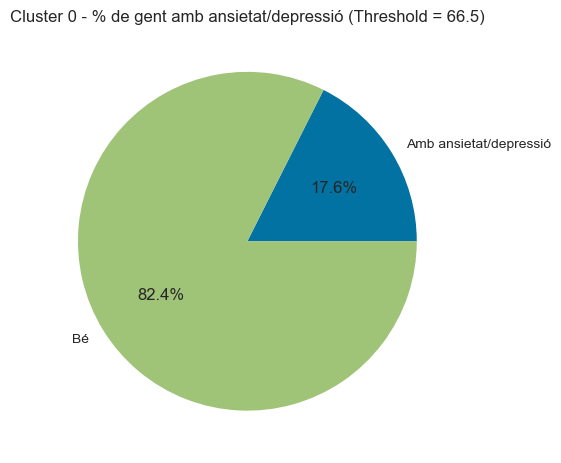

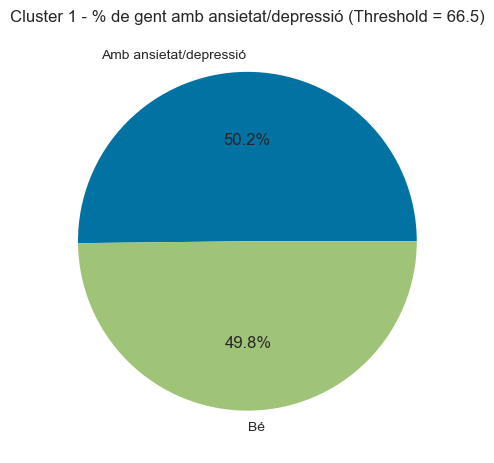

In [237]:
import matplotlib.pyplot as plt

# Definir una lista de umbrales
thresholds = [(cesd_max+stai_t_max)*0.7,(cesd_max+stai_t_max)*0.6, (cesd_max+stai_t_max)*0.5]

for threshold in thresholds:
    # Filtrem les files amb 'target' superior al llindar
    df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

    # Fem el recompte agrupant per 'cluster'
    count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

    # Mostrem el resultat
    print(f"\nRecompte estudiants que necessiten ajuda (Threshold = {threshold}):\n", count_by_cluster)

    # Gràfic de pastís amb el percentatge de gent amb ansietat/depressió per a cada cluster
    labels = 'Amb ansietat/depressió', 'Bé'
    dades = []
    for c in range(n_grups):
        resta = total_cluster[c] - count_by_cluster[c]
        dades.append([count_by_cluster[c], resta])

    for i, d in enumerate(dades):
        fig, ax = plt.subplots()
        ax.pie(d, labels=labels, autopct='%1.1f%%')
        ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió (Threshold = {threshold})')
        plt.show()


Obtenim que la millor proporció que obtenim treballant amb les característiques més rellevants utilitzant els coeficients de Regressió lineal és de 32.6% amb el treshold de 66.5.  

* Cluster 0: 17.6%
* Cluster 1: 50.2%


Observem que sí que tenim un patró on sempre treballant amb el treshols més petit obtenim que hi ha una millor agrupació en el cluster.




#### Linear Regression II

Recordem que els coeficients amb Linear Regression dels atributs que hem tingut en compte abans:

|    | Feature   | Coefficient |
|----|-----------|-------------|
| 8  | psyt      | 7.979258    |
| 2  | sex       | 4.281193    |
| 13 | erec_mean | 2.110597    |
| 14 | mbi_ex    | 1.319494    |
| 11 | qcae_aff  | 0.742631    |
| 0  | age       | 0.380706    |
| 15 | mbi_cy    | 0.224846    |
| 6  | stud_h    | 0.124795    |

Ara ens quedarem els atributs que tenen l'importància major a **1.000000**

In [238]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [239]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex']]

In [240]:
from  sklearn.preprocessing  import StandardScaler 
# Estandarizar las características 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_lr)

In [243]:
n_grups=2
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X_scaled)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [244]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,cluster
0,0,1,0.738095,17,1
1,0,1,0.690476,14,1
2,0,2,0.690476,24,0
3,0,2,0.833333,16,0
4,0,1,0.690476,22,1


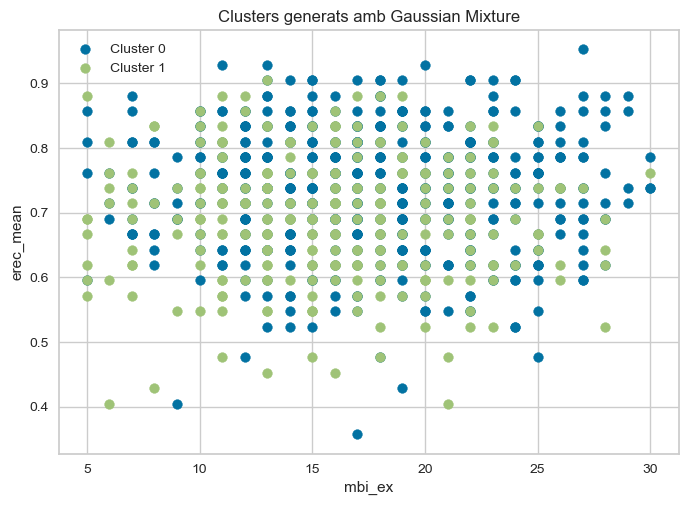

In [245]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

In [246]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

             psyt       sex  erec_mean     mbi_ex
cluster                                          
0        0.270049  2.008183   0.733341  17.445172
1        0.123636  1.000000   0.690823  15.618182


In [247]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    611
1    275
dtype: int64

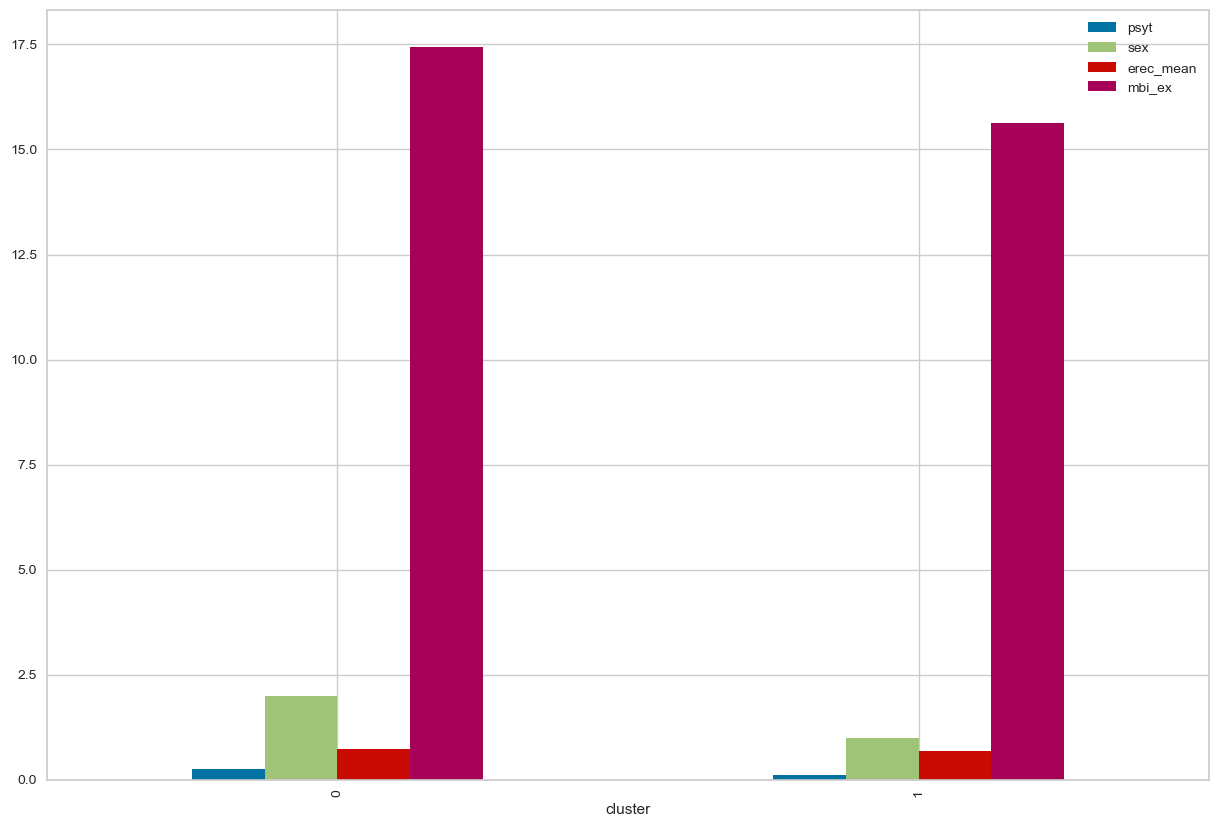

In [248]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Avaluació model

In [249]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [250]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,cluster,target
0,0,1,0.738095,17,1,95
1,0,1,0.690476,14,1,40
2,0,2,0.690476,24,0,98
3,0,2,0.833333,16,0,65
4,0,1,0.690476,22,1,60
...,...,...,...,...,...,...
881,0,1,0.619048,23,1,80
882,0,2,0.809524,17,0,67
883,0,1,0.547619,15,1,59
884,1,2,0.785714,22,0,91


In [251]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    151
1     28
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    611
1    275
dtype: int64


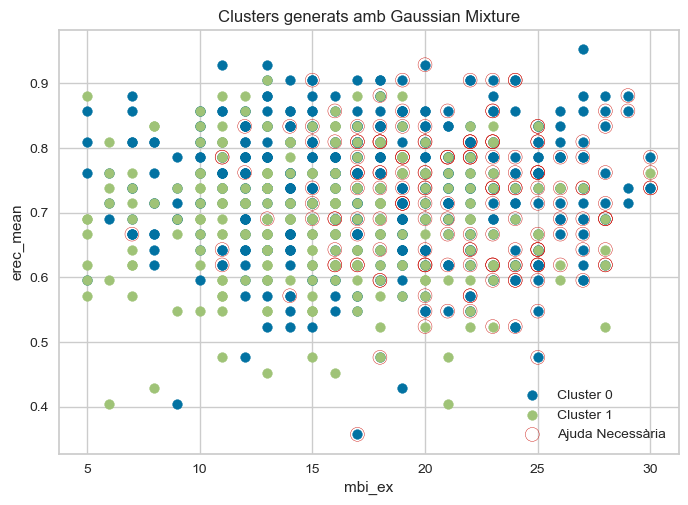

In [252]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['erec_mean'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()


Recompte estudiants que necessiten ajuda (Threshold = 79.8):
 cluster
0    151
1     28
dtype: int64


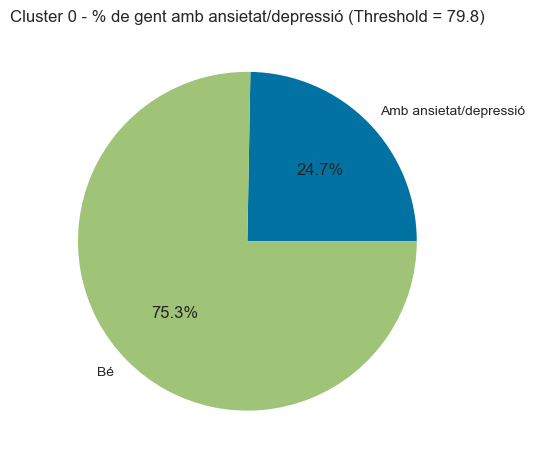

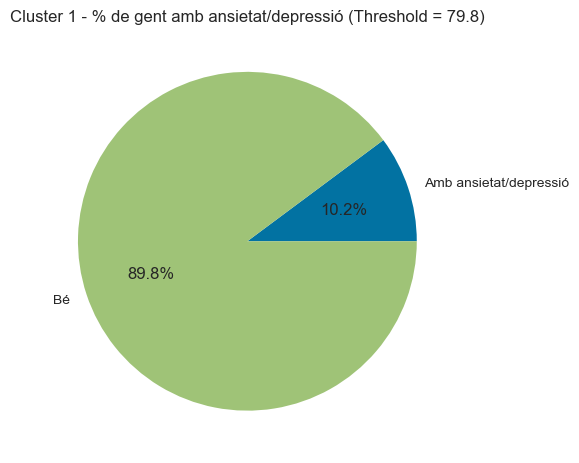


Recompte estudiants que necessiten ajuda (Threshold = 66.5):
 cluster
0    281
1     56
dtype: int64


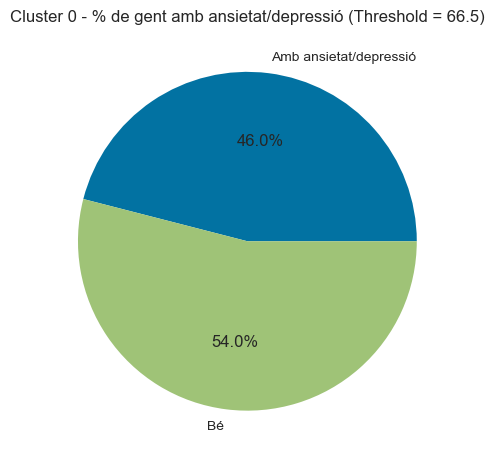

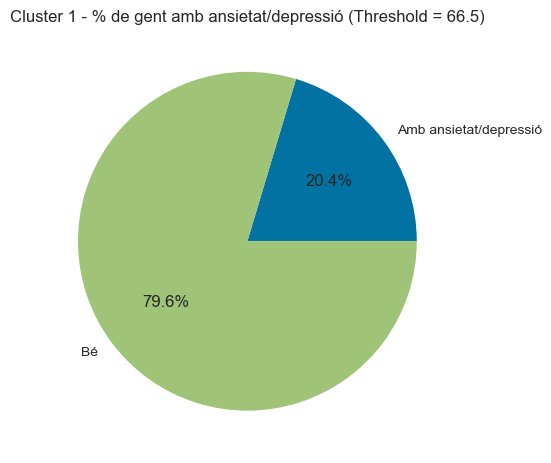

In [257]:
import matplotlib.pyplot as plt

# Definir una lista de umbrales
thresholds = [(cesd_max+stai_t_max)*0.6, (cesd_max+stai_t_max)*0.5]

for threshold in thresholds:
    # Filtrem les files amb 'target' superior al llindar
    df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

    # Fem el recompte agrupant per 'cluster'
    count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

    # Mostrem el resultat
    print(f"\nRecompte estudiants que necessiten ajuda (Threshold = {threshold}):\n", count_by_cluster)

    # Gràfic de pastís amb el percentatge de gent amb ansietat/depressió per a cada cluster
    labels = 'Amb ansietat/depressió', 'Bé'
    dades = []
    for c in range(n_grups):
        resta = total_cluster[c] - count_by_cluster[c]
        dades.append([count_by_cluster[c], resta])

    for i, d in enumerate(dades):
        fig, ax = plt.subplots()
        ax.pie(d, labels=labels, autopct='%1.1f%%')
        ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió (Threshold = {threshold})')
        plt.show()



Quan hem treballat amb el primer grup de característiques seguint la Regressió lineal, hem obtingut amb un treshold de 66.5:

* Cluster 0: 17.6%
* Cluster 1: 50.2%

Ara bé, en aquest últim pas, on hem reduït més les característiques nomès treballant amb les que són superiors a 0,1, tenim:

* Cluster 0: 46.0%
* Cluster 1: 20.4%

Amb això veiem, que el primer model ens ha donat una millor agrupació. Ara bé, hem de fixar-nos que en el primer cas ens ha sortit que el cluster 1 és el que hi ha més persones amb depressió/ansietat i en el segon cas passa al revès.

Si passem a comparar el millor resultat obtingut amb les característiques més rellevants trobades per Random Forest i les trobades per Linear Regression tenim els seguents resultats:

RANDOM FOREST:

TRESHOLD 66.5:
* Cluster 0: 64.5%
* Cluster 1: 17.9%

LINEAR REGRESSION:

TRESHOLD 66.5:
* Cluster 0: 17.6%
* Cluster 1: 50.2%

Obtenim un millor resultat quan treballem amb les característiques de Random Forest ja que tenim una proporció del 46.6% respecte al 32.6%. 
Veiem però, que en el cas de Random Forest el cluster amb més estudiants amb estat més dolent de salut mental és el cluster 0 i al Linear Regression aquest és el Cluster 1.


_No obstant, si clusteritzem amb més grups tindrem millors agrupacions?_

### Utilització de les característiques rellevants
Com a característiques rellevants fem servir aquelles que tenen coeficient major a **0.060000** amb Random Forest.
* 'jspe'
* 'qcae_cog'
* 'stud_h'
* 'qcae_aff'
* 'mbi_ex'
* 'amsp'
* 'erec_mean'
* 'mbi_ea'
* 'mbi_cy'
* 'age'

Fent 3 agrupacions per determinar si:
* necessiten assitència mèdica
* recomanable tenir assitència mèdica
* no necessiten assitència mèdica  

In [4]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [5]:
# X Random Forest
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff', 'mbi_ex', 'amsp', 'erec_mean', 'mbi_ea', 'mbi_cy', 'age']]

In [6]:
from  sklearn.preprocessing  import StandardScaler 
# Estandarizar las características 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_rf)

In [10]:
n_grups=3
model = KMeans(n_clusters=n_grups)
clusters = model.fit_predict(X_scaled)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [12]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster
0,88,62,56,27,17,17,0.738095,20,13,18,1
1,109,55,20,37,14,22,0.690476,26,11,26,0
2,106,64,36,39,24,17,0.690476,23,7,21,1
3,101,52,51,33,16,18,0.833333,21,10,21,1
4,102,58,22,28,22,21,0.690476,23,14,21,1


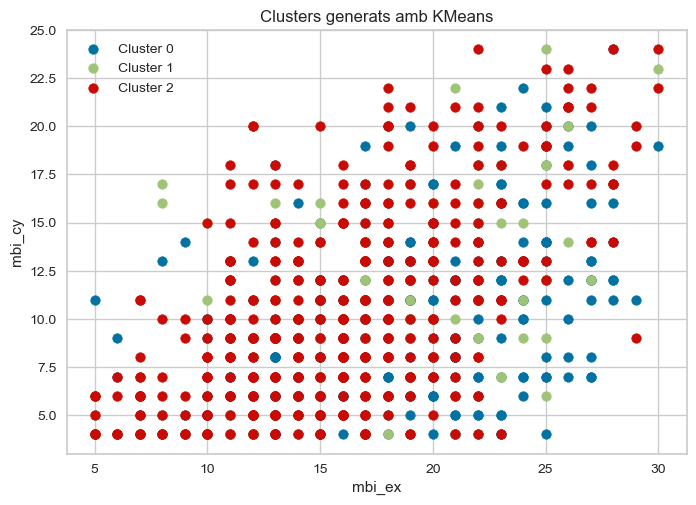

In [36]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

In [13]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h   qcae_aff     mbi_ex       amsp  \
cluster                                                                      
0        110.436578  61.227139  21.634218  34.799410  13.492625  24.952802   
1         99.511327  54.737864  32.938511  32.695793  17.417476  21.514563   
2        109.500000  59.596639  20.563025  37.474790  21.000000  22.705882   

         erec_mean     mbi_ea     mbi_cy        age  
cluster                                              
0         0.727490  27.480826   7.336283  23.657817  
1         0.693558  23.935275   9.349515  20.766990  
2         0.744198  19.899160  14.932773  22.668067  


In [14]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    339
1    309
2    238
dtype: int64

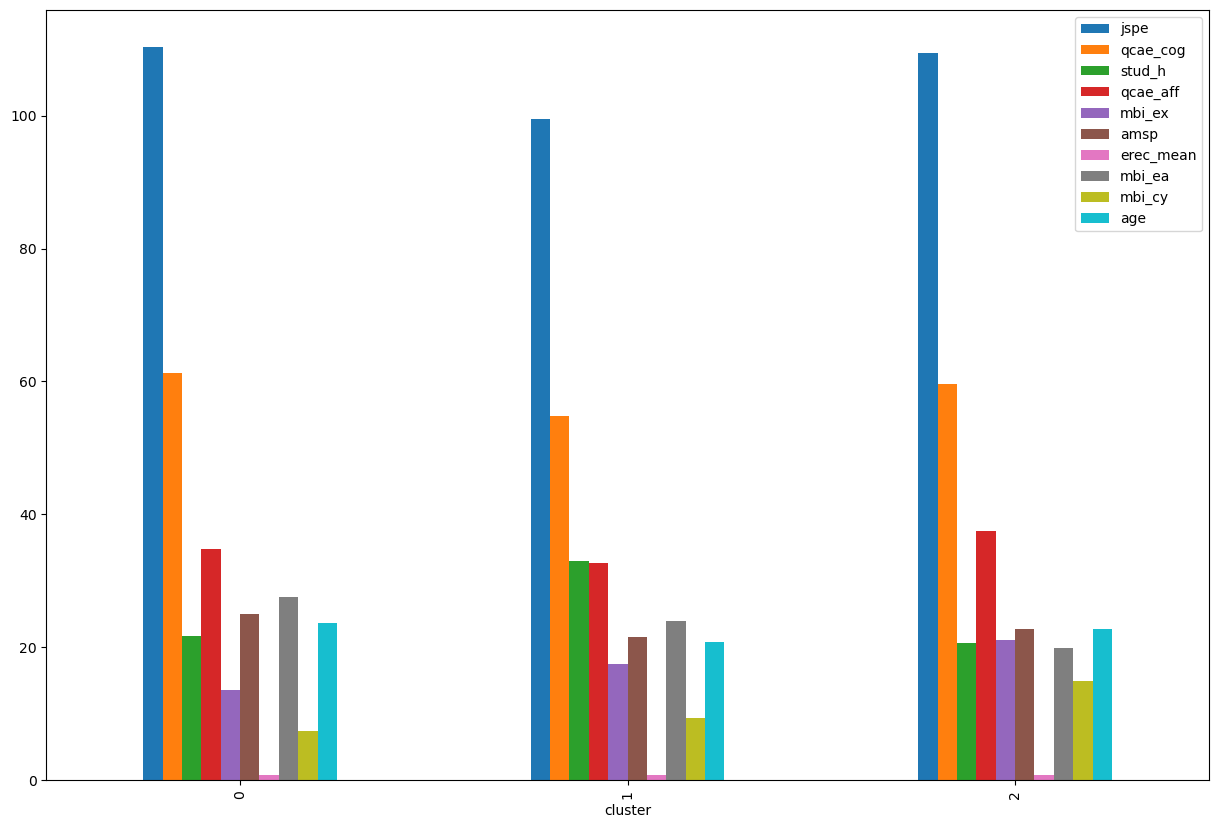

In [15]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

#### Avaluació model

In [16]:
cesd_max = 56
stai_t_max = 77
threshold1 = (cesd_max+stai_t_max)*0.33
print("threshold1", threshold1)
threshold2 = (cesd_max+stai_t_max)*0.66
print("threshold2", threshold2)

threshold1 43.89
threshold2 87.78


In [17]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster,target
0,88,62,56,27,17,17,0.738095,20,13,18,1,95
1,109,55,20,37,14,22,0.690476,26,11,26,0,40
2,106,64,36,39,24,17,0.690476,23,7,21,1,98
3,101,52,51,33,16,18,0.833333,21,10,21,1,65
4,102,58,22,28,22,21,0.690476,23,14,21,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...
881,106,63,45,39,23,28,0.619048,34,4,21,0,80
882,113,67,13,40,17,21,0.809524,24,5,20,0,67
883,100,50,50,31,15,24,0.547619,31,8,19,1,59
884,120,64,20,39,22,21,0.785714,19,15,24,2,91


In [18]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold1 = df_aval[df_aval['target'] < threshold1]
df_target_gt_threshold2 = df_aval[(df_aval['target'] > threshold1) & (df_aval['target'] < threshold2)]
df_target_gt_threshold3 = df_aval[df_aval['target'] > threshold2]

# Fem el recompte agrupant per 'cluster'
count_by_cluster1 = df_target_gt_threshold1.groupby('cluster').size()
count_by_cluster2 = df_target_gt_threshold2.groupby('cluster').size()
count_by_cluster3 = df_target_gt_threshold3.groupby('cluster').size()

# Mostrem els resultats
print("Recompte estudiants que NO necessiten ajuda\n", count_by_cluster1)
print("\nRecompte estudiants recomanable rebre ajuda\n", count_by_cluster2)
print("\nRecompte estudiants que SÍ necessiten ajuda\n", count_by_cluster3)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que NO necessiten ajuda
 cluster
0    148
1     47
2     14
dtype: int64

Recompte estudiants recomanable rebre ajuda
 cluster
0    179
1    229
2    157
dtype: int64

Recompte estudiants que SÍ necessiten ajuda
 cluster
0    12
1    33
2    67
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    339
1    309
2    238
dtype: int64


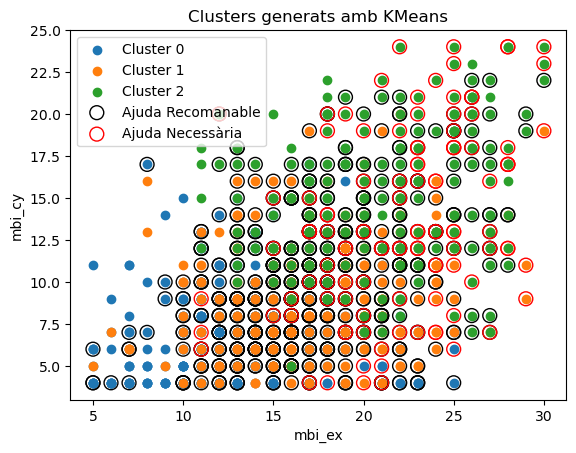

In [19]:
for i in range(n_grups):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold2['mbi_ex'], df_target_gt_threshold2['mbi_cy'], label='Ajuda Recomanable', facecolors='none', edgecolors='black', marker='o', s=100)
plt.scatter(df_target_gt_threshold3['mbi_ex'], df_target_gt_threshold3['mbi_cy'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb KMeans')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

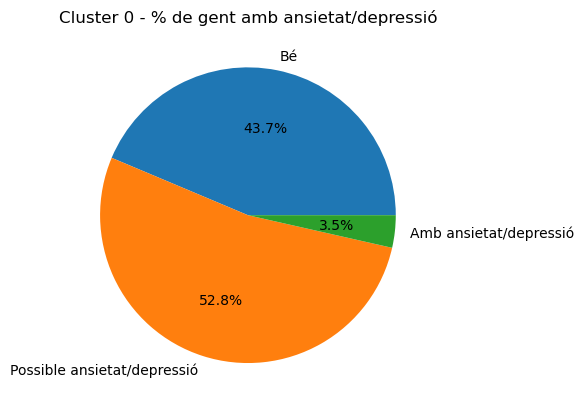

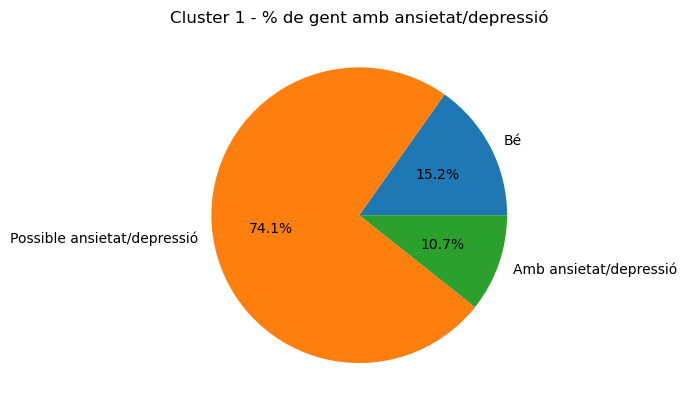

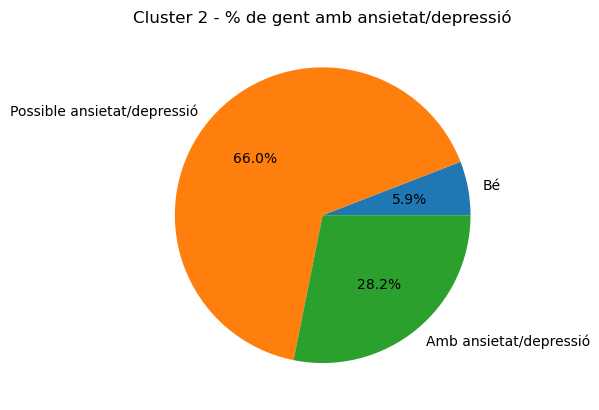

In [20]:
labels = 'Bé', 'Possible ansietat/depressió', 'Amb ansietat/depressió'
dades = []
for c in range(n_grups):
    dades.append([count_by_cluster1[c], count_by_cluster2[c], count_by_cluster3[c]])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()